<a href="https://colab.research.google.com/github/maria192001/SemanaTec/blob/main/5_2_Actividad_Visualizacio%CC%81n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

- **Nombre**: María Paula García García
- **Matrícula**: A00827374

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/ST_herramientas: arte-analitica-main'

/content/drive/MyDrive/ST_herramientas: arte-analitica-main


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

In [5]:
# Carga las librerías y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/auto-mpg.csv')
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


Text(0.5, 1.0, 'Fabricantes')

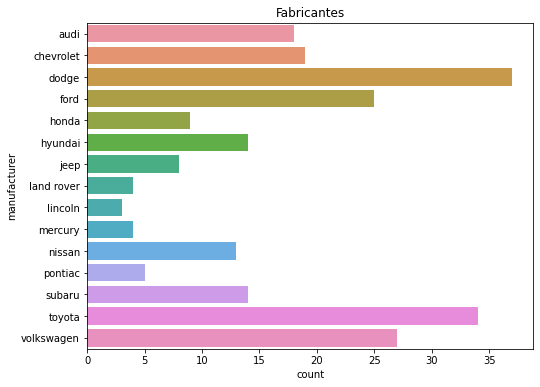

In [15]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.

fig = plt.figure(figsize=(8, 6))

# Vamos a contar cuántos paises hay en cada región en 2006
# Cada renglón corresponde a un país en un año específico
# Filtrar para el año 2006
sns.countplot(data=df, y='manufacturer')
plt.title('Fabricantes')


Text(0.5, 1.0, 'Distribución de hwy')

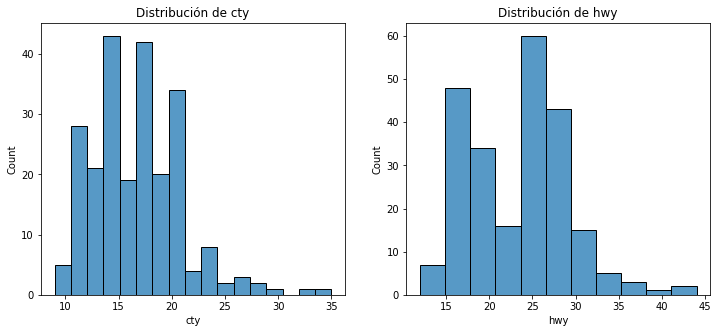

In [23]:
# Haz un histograma de las variables numéricas cty, hwy y haz una comparación en un gráfico lado a lado
fig, axs = plt.subplots(1,2, figsize=(12, 5))
sns.histplot(data = df, x='cty', ax=axs[0])
axs[0].set_title('Distribución de cty')
sns.histplot(data = df, x='hwy', ax=axs[1])
axs[1].set_title('Distribución de hwy')




Text(0.5, 1.0, 'Relación entre rendimiento en carretera y número de cilindros')

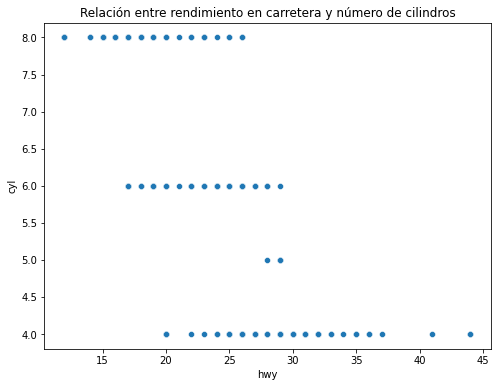

In [38]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x = 'hwy', y = 'cyl')
plt.title('Relación entre rendimiento en carretera y número de cilindros')


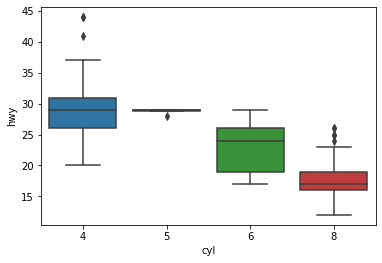

In [32]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?
sns.boxplot(data=df, y="hwy", x="cyl")

Text(0.5, 1.0, 'Relación entre desplazamiento de motor y rendimiento dentro de la ciudad')

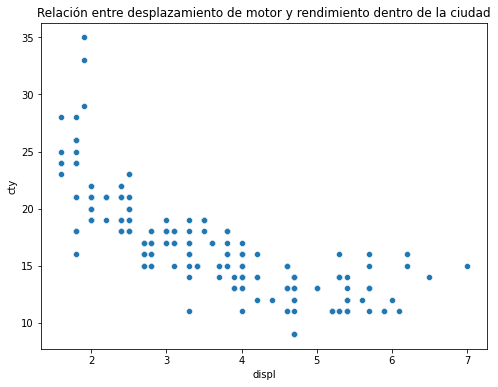

In [35]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x = 'displ', y = 'cty')
plt.title('Relación entre desplazamiento de motor y rendimiento dentro de la ciudad')

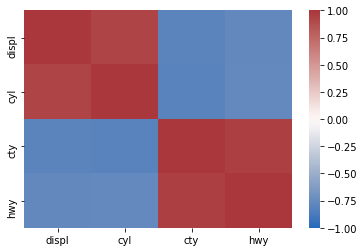

In [37]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE
corr_matrix = df.loc[:, ['displ','cyl','cty','hwy']].corr()
sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, cmap='vlag')

In [ ]:
# ¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?


Las variables que tienen una relación positiva son desplazamiento del motor--número de cilíndros y rendimiento del motor en ciudad--rendimiento del motor en carretera. 
Por otra parte las que tienen una relación negativa son desplazamiento del motor--el rendimiento del motor en carretera; desplazamiento--rendimiento de motor en ciudad; número de cilindros--el rendimiento del motor en carretera y número de cilindros--rendimiento de motor en ciudad. 

Text(0.5, 1.0, 'Rendimiento en ciudad vs. tiempo')

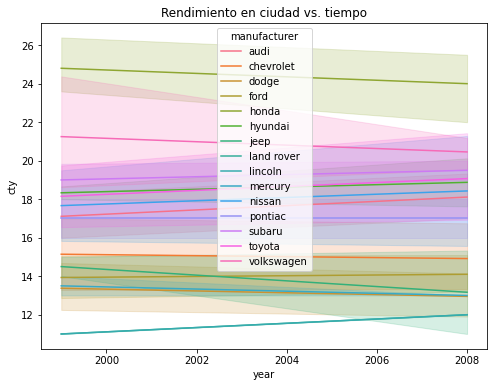

In [44]:
# ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento promedio y grafica los resultados.

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data=df, y='cty', x='year', hue='manufacturer')
plt.title('Rendimiento en ciudad vs. tiempo')
